# CAQL Stream Operations

In this section we take a step back and review some basic stream operations.

In [1]:
%matplotlib inline
%run preamble.py

## Arithmetic and the op:* package

CAQL supports the usual arithmetic operations: +,-,*,/

They are available as binary operators or via the functions: op:sum(), op:sub(), op:prod(), op:div().

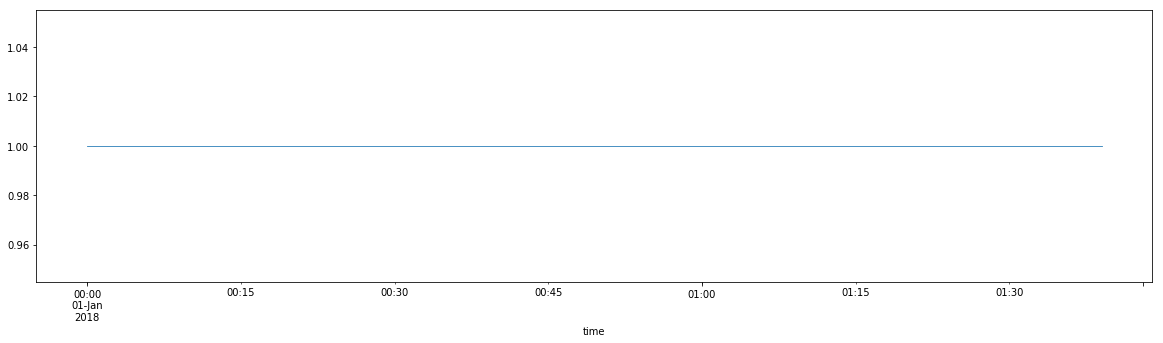

In [2]:
caql_plot('demo', '''

(1 + 2) / 3

''', datetime(2018,1,1), 60, 100)

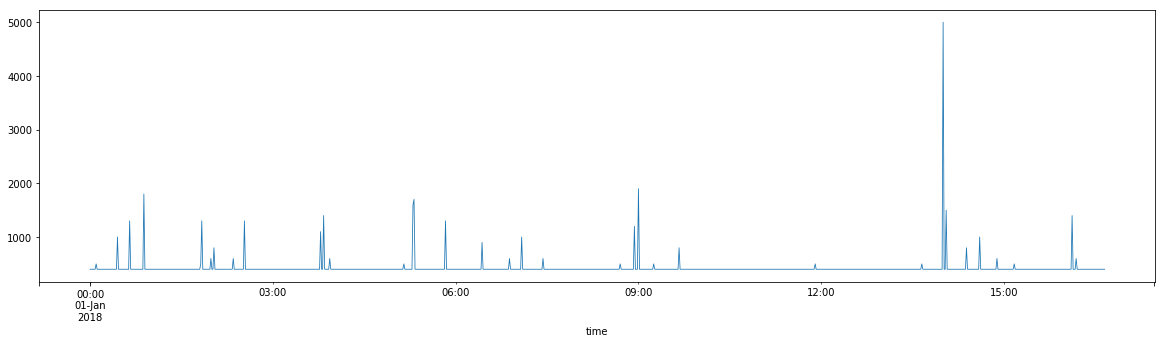

In [10]:
caql_plot("demo",'''

metric:average("673044d5-379a-4037-89e5-c0694ef756ed","duration") + 3 
| op:prod{100}
| stats:min(5000) // limit spike height

''', datetime(2018,1,1), 60, 1000)

## Comparison operators

CAQL Supports the following comparison operators: <, <=, ==, >=, >.

They are also available as functions op:lt(), op:leq(), op:eq(), ... (names lended from `man test`).

The results are boolean values represented as numeric values 0 (false) 1 (true).

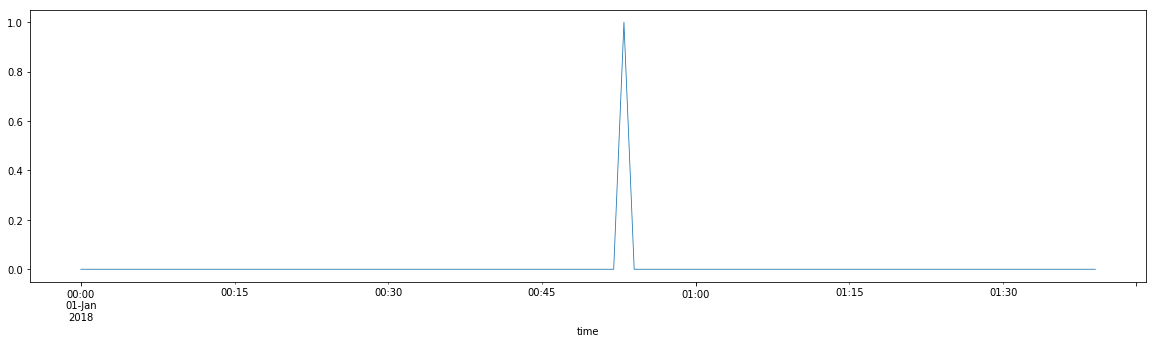

In [12]:
caql_plot("demo", '''

metric:average("673044d5-379a-4037-89e5-c0694ef756ed","duration") > 10

''', datetime(2018,1,1), 60, 100)

## Application: Uptime Reporting

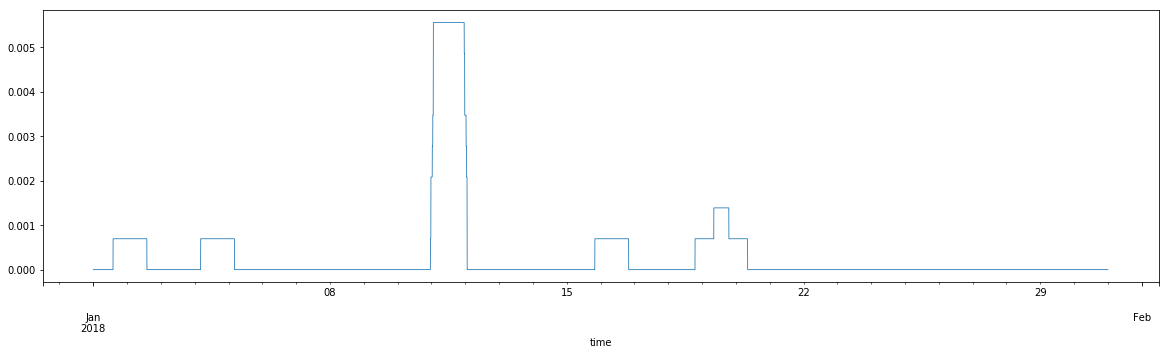

In [17]:
## Count SLA Violation over per day

caql_plot("demo", '''

metric:average("673044d5-379a-4037-89e5-c0694ef756ed","duration") > 50  // SLA Violation
| rolling:mean(1d)

''', datetime(2018,1,1), 60, 60 * 24 * 30)

## Application: Emulate Alerting Rules

Threshold based alerting rules can be emulated using CAQLs <,> operators.

In order to specify a time to wait before seinding out an alert, you can use the wait() function:

* wait(duration) - Returns 1 if the value has been 1 for a given time duration.

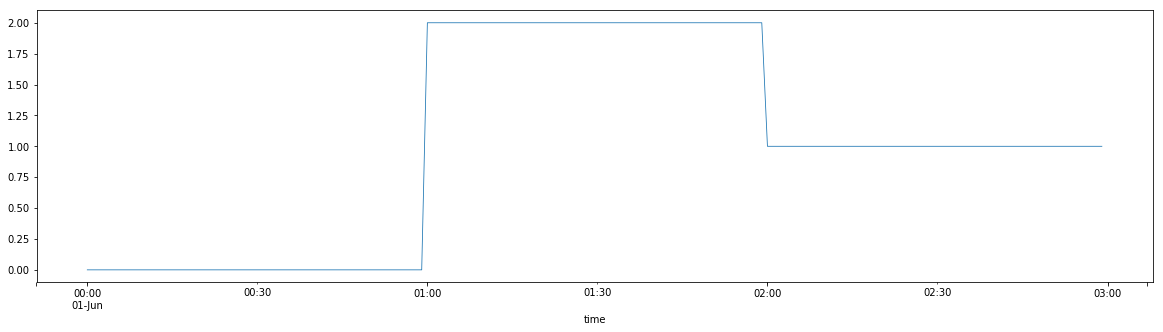

In [21]:
caql_plot("ops",'''

metric:counter("09a0a30e-e9df-4c79-8ea5-fc2024864874","message_stats`get_no_ack") > 4
| wait(3M) // specify wait period before sending out an alert
| window:sum(1h) // count alerts per hour

''', datetime(2018, 6, 1), 60, 60 * 3)

## Integrals and Differentials

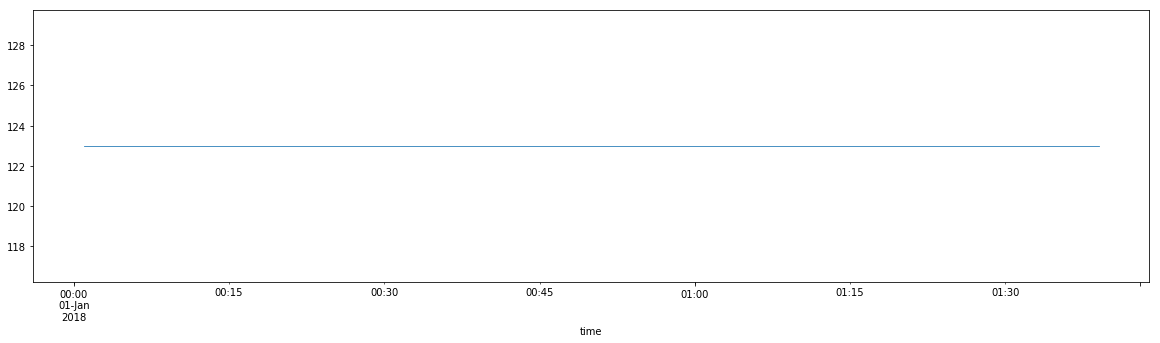

In [27]:
caql_plot('demo', '''

123 | integrate() | diff()

''', datetime(2018,1,1), 60, 100)

## Variant: Lagged Differences

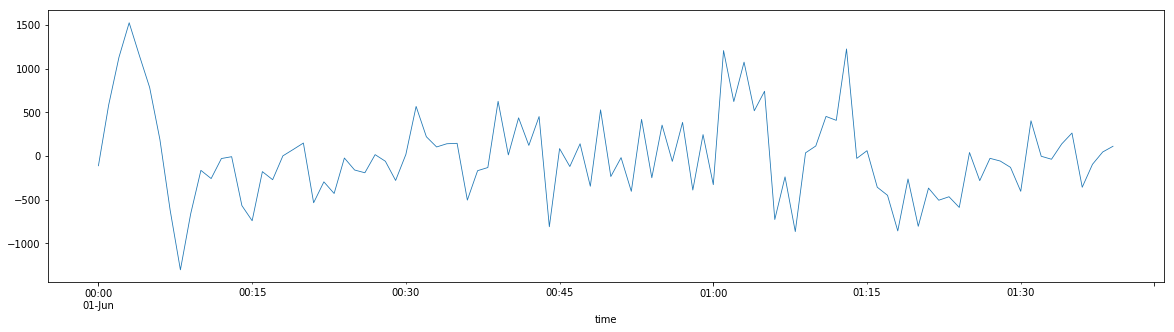

In [29]:
caql_plot('ops', '''

op:sub{
  metric:counter("af84f742-fa85-41bf-85b2-ea3c780ae6d5","exchanges`_aggregate`routed"),
  metric:counter("af84f742-fa85-41bf-85b2-ea3c780ae6d5","exchanges`_aggregate`routed") | delay(5M)
}

''', datetime(2018,6,1), 60, 100)

## Smoothing data with Exponential Moving Averages

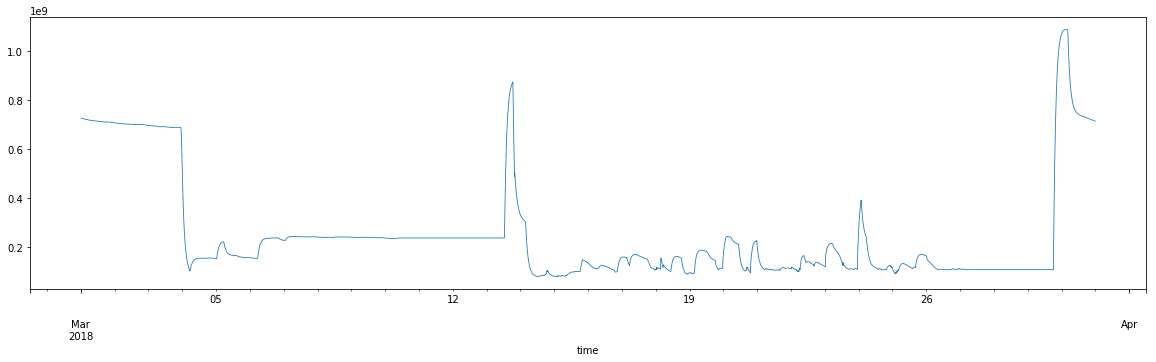

In [34]:
caql_plot('hartmann','''

metric:average('b6266779-c835-4341-a71b-a250e68d2347', 'vm`meminfo`MemFree')
// | rolling:mean(1h)
| forecasting:ewma(0.01)

''', datetime(2018,3,1), 60, 60*24*30)

## Time functions

* time:epoch() -- returns the current epoch in seconds
* time:tz(timezone, field) -- returns timezone information from the tz database

For a list of supported timezones see 

* https://en.wikipedia.org/wiki/List_of_tz_database_time_zones
* https://en.wikipedia.org/wiki/Tz_database

**TODO:** Allow windowing functions to be triggered by tz information. 

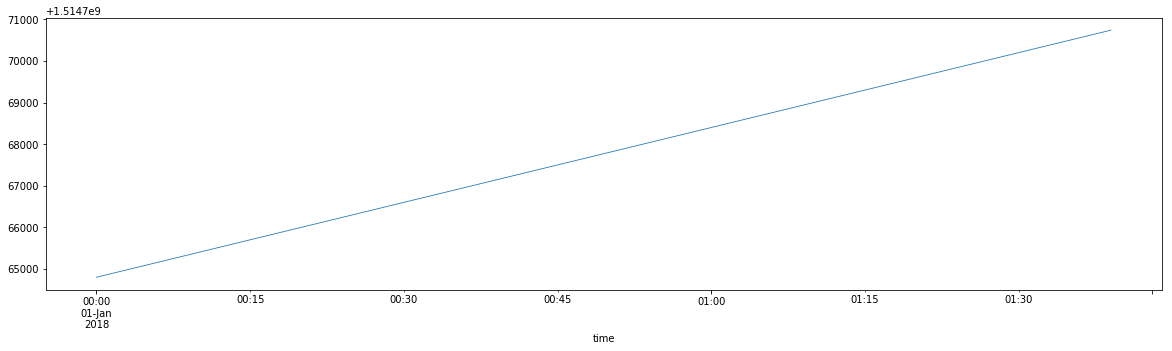

In [35]:
caql_plot('demo', '''

time:epoch()

''', datetime(2018,1,1), 60, 100)

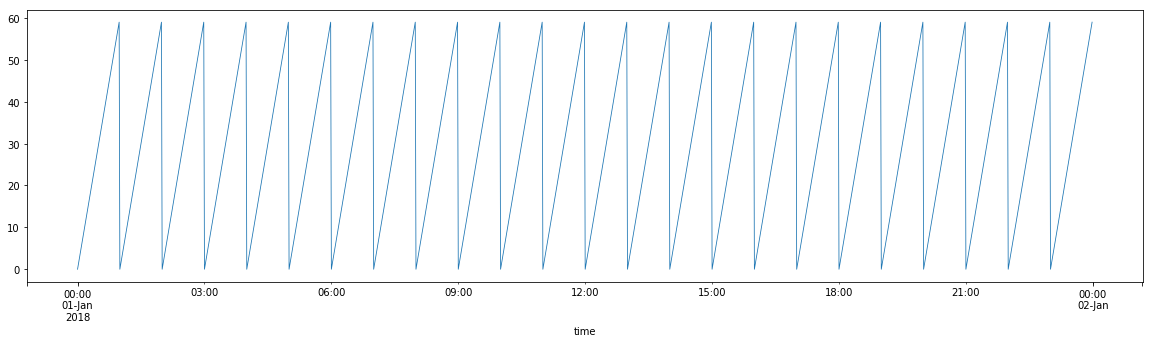

In [36]:
caql_plot('demo', '''

time:tz("UTC","minute")

''', datetime(2018,1,1), 60, 60*24)

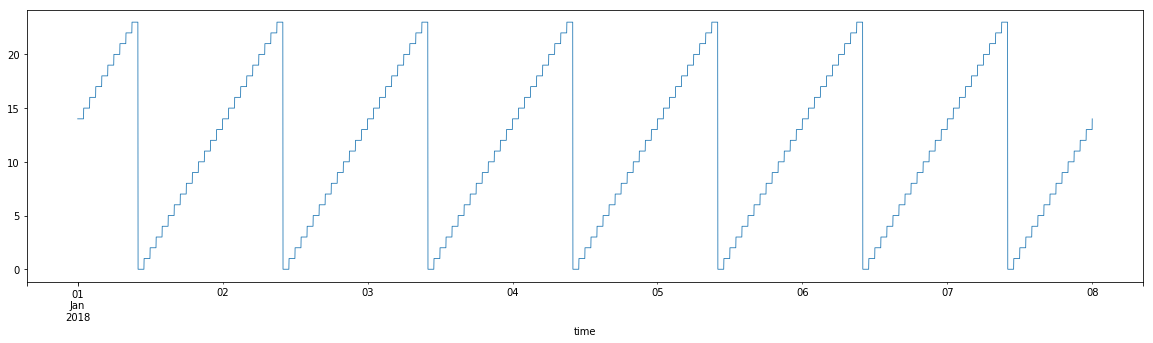

In [37]:
caql_plot('demo', '''

time:tz("Pacific/Tahiti","hour")

''', datetime(2018,1,1), 60, 60*24*7)

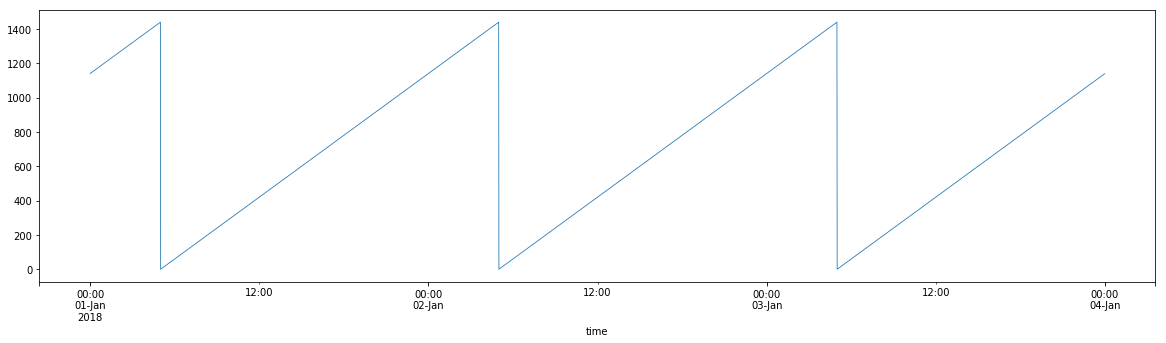

In [38]:
caql_plot('demo', '''

time:tz("US/Eastern","hour") * 60 + time:tz("US/Eastern", "minute")

''', datetime(2018,1,1), 60, 60*24*3)